<a href="https://colab.research.google.com/github/Dare-Badejo-001/Industrial-Stats-Design-of-experiments/blob/main/Ch1_ToolkitBuildup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install the required library

In [ ]:
# Install necessary packages
!pip install outdated mistat pingouin pwlf

# Set up the environment and suppress warnings
import os
os.environ['OUTDATED_IGNORE'] = '1'

import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Import necessary libraries
import matplotlib.pyplot as plt
import mistat
import pingouin as pg
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import tree
import statsmodels.formula.api as smf
import pwlf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pwlf: filename=pwlf-2.2.1-py3-none-any.whl size=16605 sha256=d9be93dcf722875f77ea03334182fd691a721fda776f7343b0123c436a7d17fb
  Stored in directory: /root/.cache/pip/wheels/d9/13/6f/a9201ce279d71065ce782d82418d7c6877be6bb818ae0d1095
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=dc3551d643cd9c7cced106ad030f2c7c6391e916d44246729f113694506ac61a
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
  Created wheel for diversipy: filename=diversipy-0.8-py3-none-any.whl size=27515 sha256=cab3e2c4b8e738cc49facb016a291bfd3c38c2f5095712f4ba16d3664bf4f84c
  Stored in directory: /root/.cache/pip/wheels/3a/20

In [ ]:
# Load data and plot
oturb1 = mistat.load_data('OTURB1')

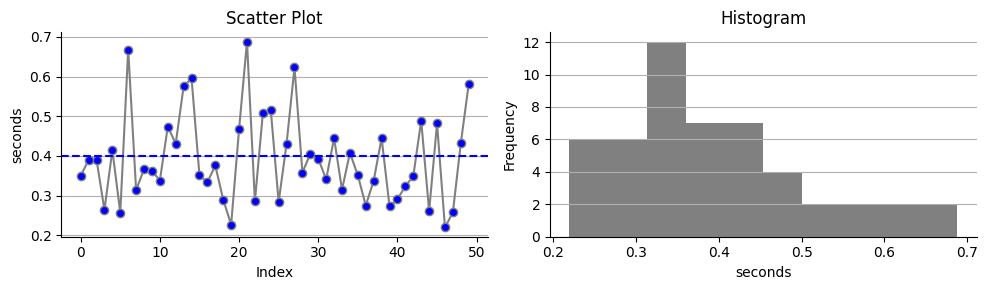

In [ ]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10,3))

# Plot 1: Scatter plot
ax = oturb1.plot(y=['seconds'], color='grey', legend=False, marker='o', markerfacecolor='blue', ax=axs[0])
ax.set_xlabel('Index')
ax.set_ylabel('seconds')
ax.set_title('Scatter Plot')
# Remove top and right splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Add y-axis grid
ax.yaxis.grid(True)
# Add dashed line at y = 0.4
ax.axhline(y=0.4, color='blue', linestyle='--')

# Plot 2: Histogram
ax = oturb1.plot.hist(bins=10, color='grey', ax=axs[1])
ax.set_xlabel('seconds')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add y-axis grid
ax.yaxis.grid(True)


plt.tight_layout()
plt.show()

## Notes on the scatter plot and histogram
### Plot Analysis

#### Scatter Plot
-Shows fluctuating data with no clear trend.

#### Histogram
-Most values are distributed around 0.4 seconds.
-Right-skewed distribution.
-The scatter plot highlights the variability in the data, while the histogram indicates that the values are primarily centered around 0.4 seconds.

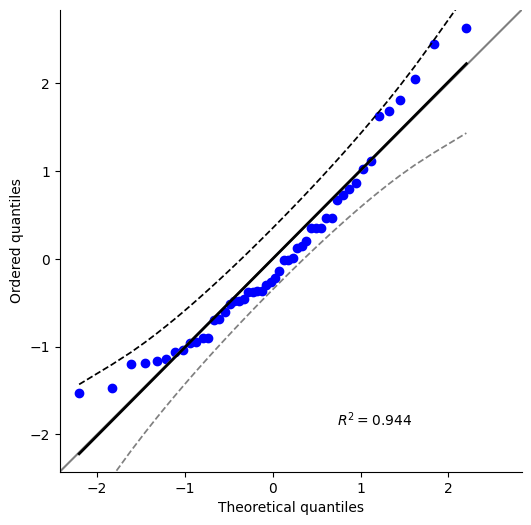

In [ ]:
plt.figure(figsize=(10,6))
pg.qqplot(oturb1)
ax = plt.gca()
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.get_lines()[4].set_color('grey')
plt.show()


### Simulation Run

Sure, here are the step-by-step instructions for the code provided:

1. **Initialize the Piston Simulator:**
   - Create a `PistonSimulator` object with specified parameters for the number of simulations, number of replicates, and a seed for reproducibility.

2. **Run the Simulation:**
   - Use the `simulate()` method of the `PistonSimulator` object to run the piston simulation and store the results.

3. **Group the Simulated Data:**
   - Group the cycle times by their respective groups using the `qcc_groups()` function to prepare the data for quality control analysis.

4. **Create the Quality Control Chart:**
   - Initialize a `QualityControlChart` object with the grouped cycle time data.

5. **Plot the Quality Control Chart:**
   - Create a new figure and axes with a specified size for the plot.
   - Use the `plot()` method of the `QualityControlChart` object to generate the chart, providing a title and specifying the axes for the plot.
   - Display the plot using `plt.show()`.

# X Chart

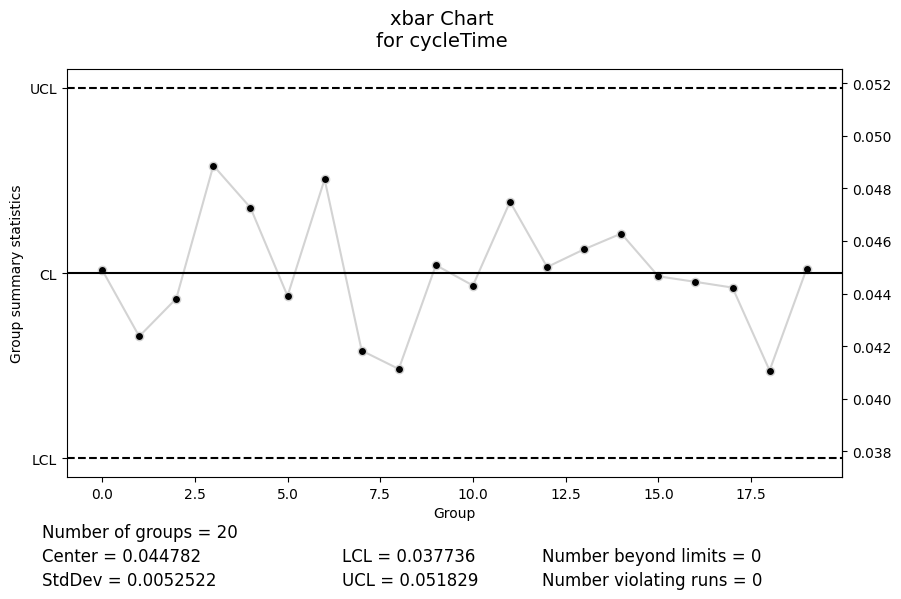

In [ ]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1)

# run simulation for a piston
Ps = simulator.simulate()

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(10, 6))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

### Interpretation of the x-bar Chart for Cycle Time

#### Key Elements:
- **Center Line (CL):** Represents the average cycle time (0.044782 seconds).
- **Upper Control Limit (UCL):** The maximum acceptable limit for cycle time variations (0.051829 seconds).
- **Lower Control Limit (LCL):** The minimum acceptable limit for cycle time variations (0.037736 seconds).
- **Number of Groups:** 20
- **Standard Deviation (StdDev):** 0.0052522 seconds
- **Number beyond limits:** 0 (No points are outside the control limits)
- **Number violating runs:** 0 (No runs violate the control chart rules)

#### Insights:
- **Variability:** The cycle times fluctuate around the center line, indicating some natural variation in the process.
- **Control:** All data points fall within the upper and lower control limits, showing that the process is in statistical control.
- **Consistency:** There are no runs or points beyond the control limits, suggesting consistent performance without significant shifts or trends.

Overall, the x-bar chart indicates that the piston simulation process is stable and operating within acceptable limits, with no indications of unusual variations or trends.

# S Chart

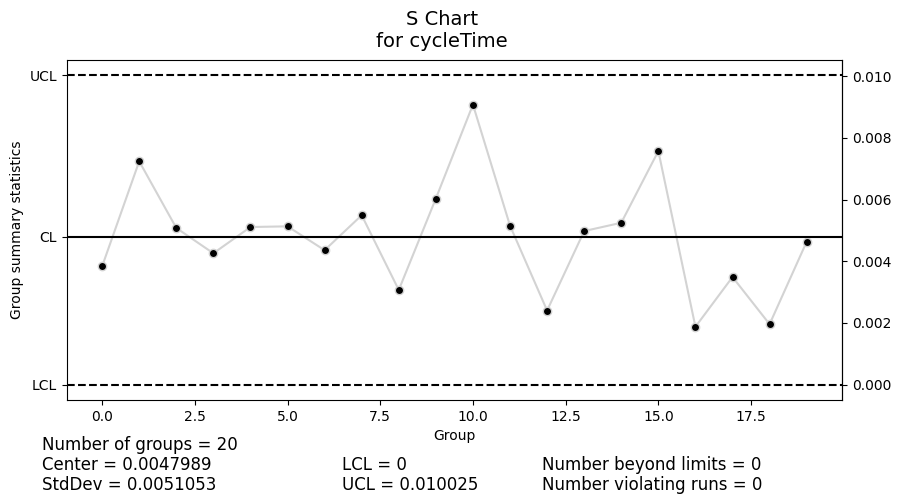

In [ ]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(10, 5))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

In [ ]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1)
Ps = simulator.simulate()

In [ ]:
Ps['seconds'].groupby(Ps['group']).apply(np.mean)

group
1     0.044902
2     0.042374
3     0.043812
4     0.048865
5     0.047265
6     0.043910
7     0.048345
8     0.041833
9     0.041135
10    0.045080
11    0.044307
12    0.047490
13    0.045008
14    0.045684
15    0.046281
16    0.044656
17    0.044445
18    0.044227
19    0.041077
20    0.044947
Name: seconds, dtype: float64

In [ ]:
t = [295] * 7
t.extend([296 * 1.2**i for i in range(1, 14)])
simulator = mistat.PistonSimulator(t=t, seed=1, check=False, n_simulation=20, n_replicate=5)
Ps = simulator.simulate()

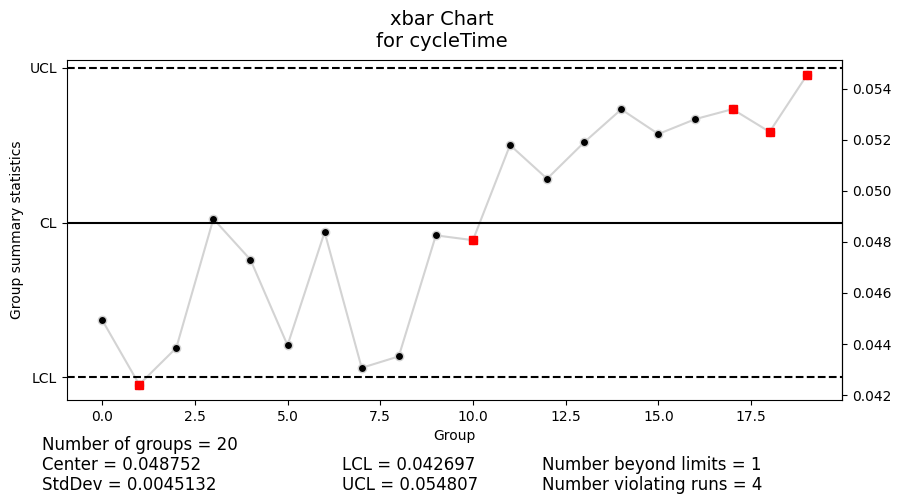

In [ ]:
cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)
fig, ax = plt.subplots(figsize=(10,5))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

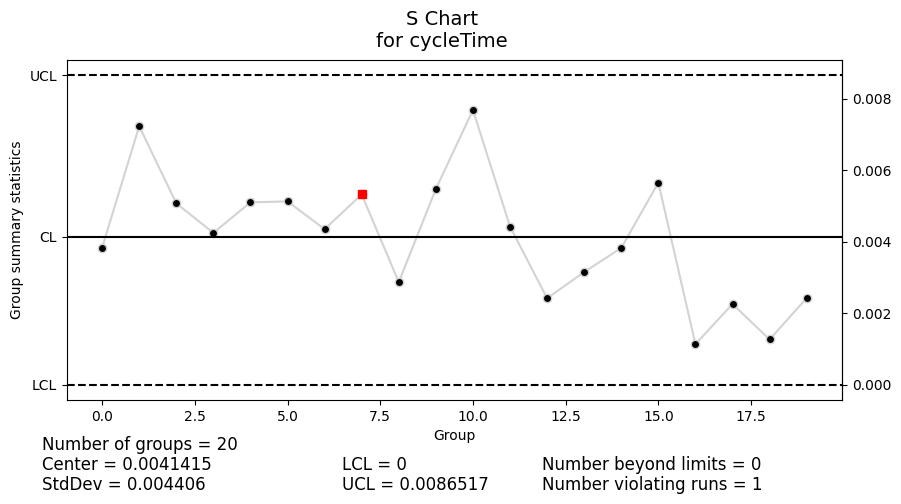

In [ ]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(10, 5))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

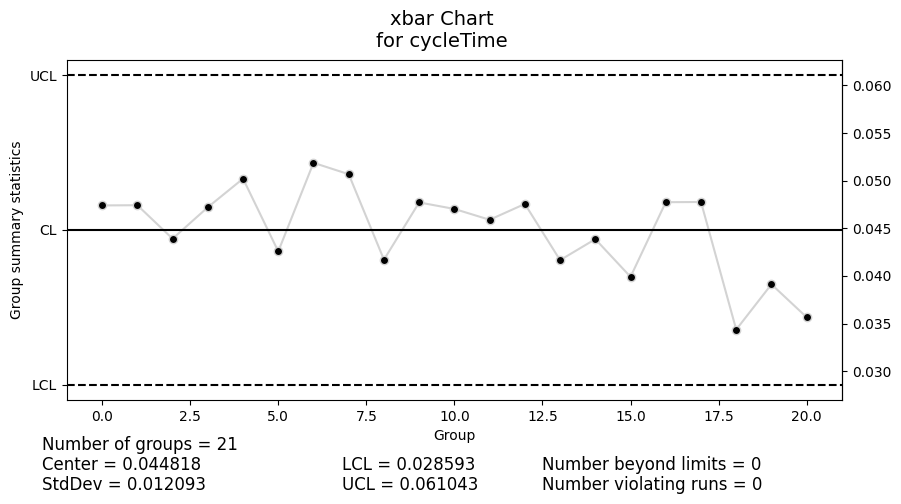

In [ ]:
k = [3_000] * 105
sigma_k = [50] * 45
sigma_k.extend([50 * 1.15**i for i in range(1, 61)])

Ps = mistat.PistonSimulator(k=k, seed=3, check=False)
Ps.errors['k'] = sigma_k
Ps = Ps.simulate()
Ps = mistat.simulationGroup(Ps, 5)

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(10,5))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

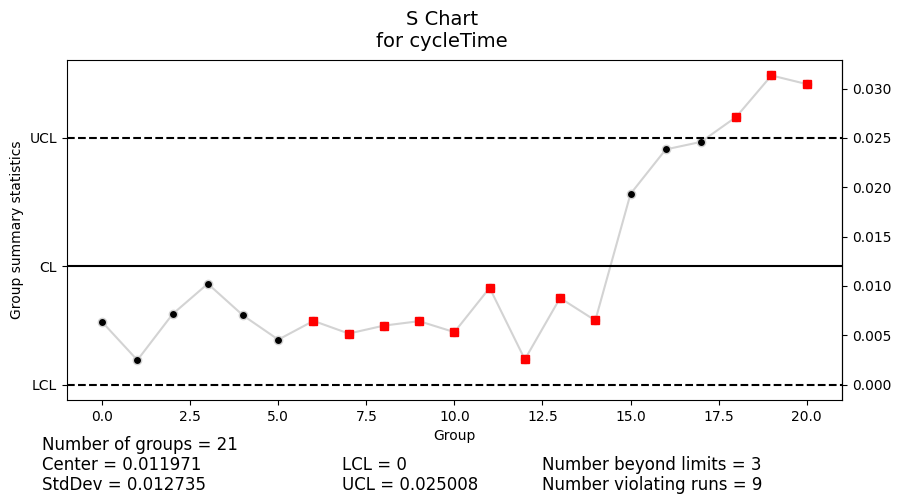

In [ ]:
qcc = mistat.QualityControlChart(cycleTime, qcc_type='S')

fig, ax = plt.subplots(figsize=(10,5))
qcc.plot(title='for cycleTime', ax=ax)
plt.show()

### Driving a Process with Control Charts

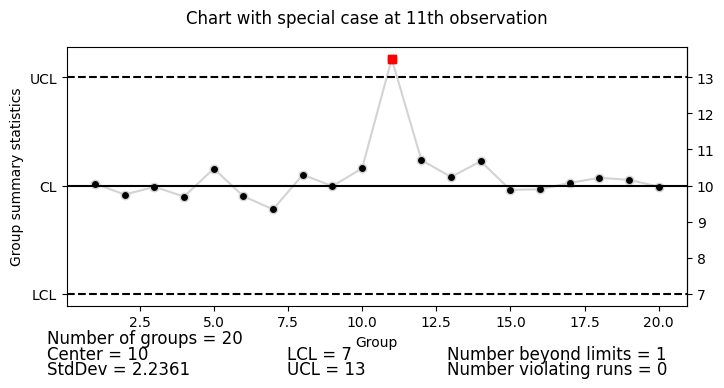

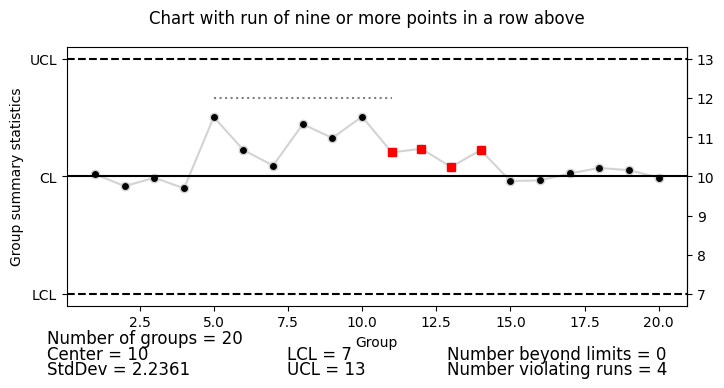

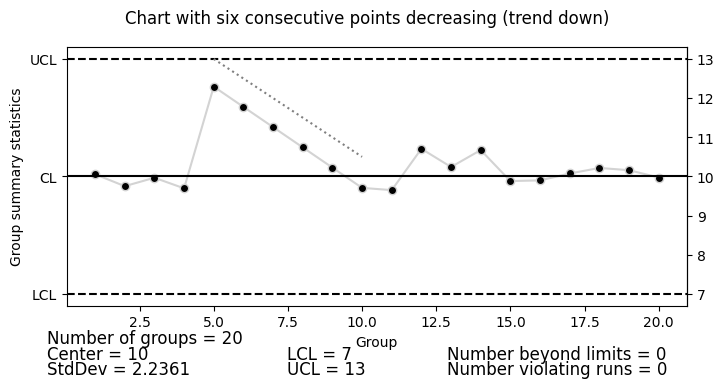

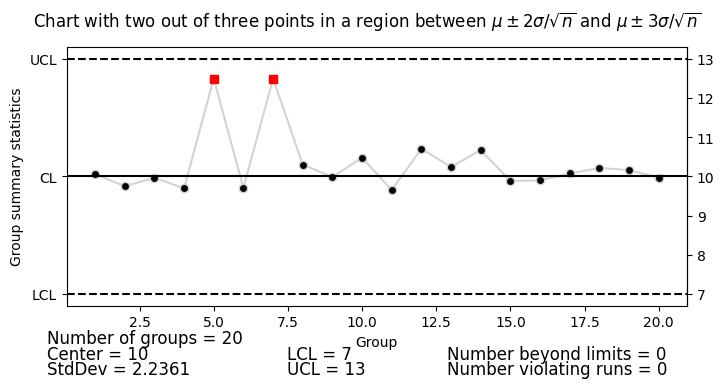

In [ ]:
np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[50:55] = 1.4 * X[50:55]

G = [int(i) for i in np.repeat(np.linspace(1, 20, 20), 5)]
Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

figsize = (8, 3.8)
fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot(11, qcc.stats.statistics[10], 'r', marker='s')
fig.suptitle('Chart with special case at 11th observation')

np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[20:55] = 1.1 * X[20:55]

Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot([5, 11], [12, 12], color='grey', linestyle='dotted')
fig.suptitle('Chart with run of nine or more points in a row above')

np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[20:50] = np.linspace(12.5, 9.5, 30)

G = [int(i) for i in np.repeat(np.linspace(1, 20, 20), 5)]

Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot([5, 10], [13, 10.5], color='grey', linestyle='dotted')
fig.suptitle('Chart with six consecutive points decreasing (trend down)')

np.random.seed(1)
X = stats.norm(10, 1).rvs(100)
X[20:25] = 12.5
X[30:35] = 12.5

Process = mistat.qcc_groups(X, G)
qcc = mistat.QualityControlChart(Process, center=10, std_dev=2.236071, labels=range(1, 21))

fig, ax = plt.subplots(figsize=figsize)
qcc.plot(ax=ax)
ax.plot(5, qcc.stats.statistics[4], 'r', marker='s')
ax.plot(7, qcc.stats.statistics[6], 'r', marker='s')
fig.suptitle('Chart with two out of three points in a region between $\mu\pm 2\sigma/\sqrt{n}$ and $\mu \pm 3\sigma/\sqrt{n}$')

plt.show()

In [ ]:
## Setting Up a Control Chart:  Process Capability Studies

        LCL       UCL
0  0.037736  0.051829


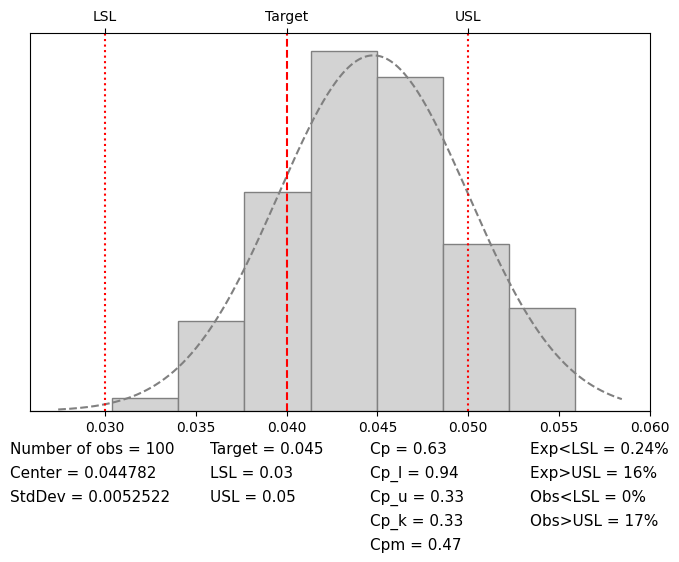

Process Capability Analysis

Number of obs = 100          Target = 0.04
       Center = 0.04            LSL = 0.03
       StdDev = 0.005252        USL = 0.05

Capability indices:

        Value     2.5%   97.5%
Cp      0.6347  0.5463  0.7228
Cp_l    0.9382  0.8156  1.0608
Cp_u    0.3312  0.2640  0.3983
Cp_k    0.3312  0.2512  0.4111
Cpm     0.4693  0.3910  0.5474

Exp<LSL   0%   Obs<LSL   0%
Exp>USL  16%   Obs>USL  17%
z_target: -0.910
z_usl: 0.994
p_above_usl: 0.160


In [ ]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1)
Ps = simulator.simulate()

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)
print(qcc.limits)

pc = mistat.ProcessCapability(qcc, spec_limits = [0.03, 0.05])

pc.plot()
plt.show()
pc.summary()
z_target = (0.04 - 0.04478) / 0.0052521
z_usl = (0.05 - 0.04478) / 0.0052521
p_above_usl = 1-stats.norm.cdf((0.05 - 0.04478) / 0.0052521)
print(f'z_target: {z_target:.3f}')
print(f'z_usl: {z_usl:.3f}')
print(f'p_above_usl: {p_above_usl:.3f}')

### Process Capability Indices

In [ ]:
np.random.seed(seed=1) # fix random seed for reproducibility
X = stats.norm.rvs(size=20, scale=1/3)
Xbar = np.mean(X)
S = np.std(X)

In [ ]:
Cpl = (Xbar - (-1)) / (3 * S)
Cpu = (1 - Xbar) / (3 * S)
Cpk = min(Cpu, Cpl)
F = stats.f.ppf(0.975, 1, 19)

In [ ]:
b = 1 - F/40
a = np.sqrt(F/20) * np.sqrt( Cpl**2/2 + b/9)
rho_1U = (Cpl + a) / b
rho_1L = (Cpl - a) / b
a = np.sqrt(F/20) * np.sqrt( Cpu**2/2 + b/9)
rho_2U = (Cpu + a) / b
rho_2L = (Cpu - a) / b

## Seven Tools for Process Control and Process Improvement

1. ParetoChart

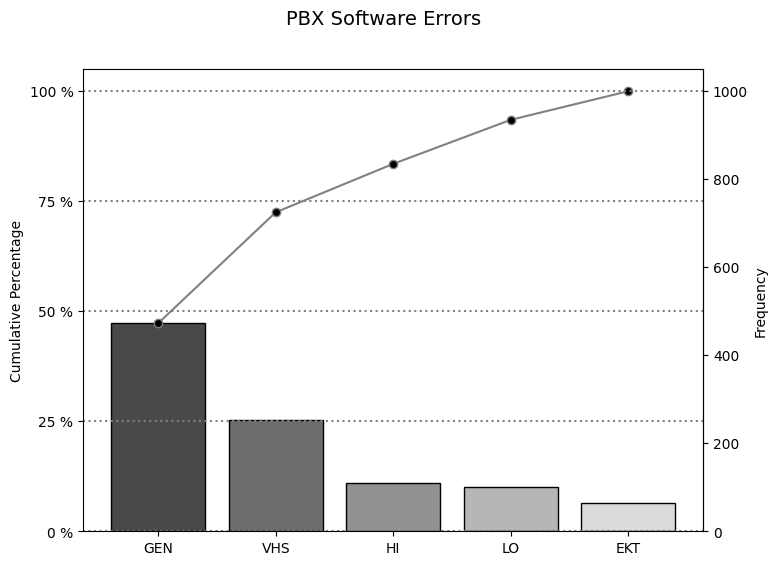

In [ ]:
pbx = mistat.load_data('PBX')
pbx = pbx.set_index('Unit')

paretoChart = mistat.ParetoChart(pbx, title='PBX Software Errors')
paretoChart.plot()
plt.show()

2. Xbar Chart

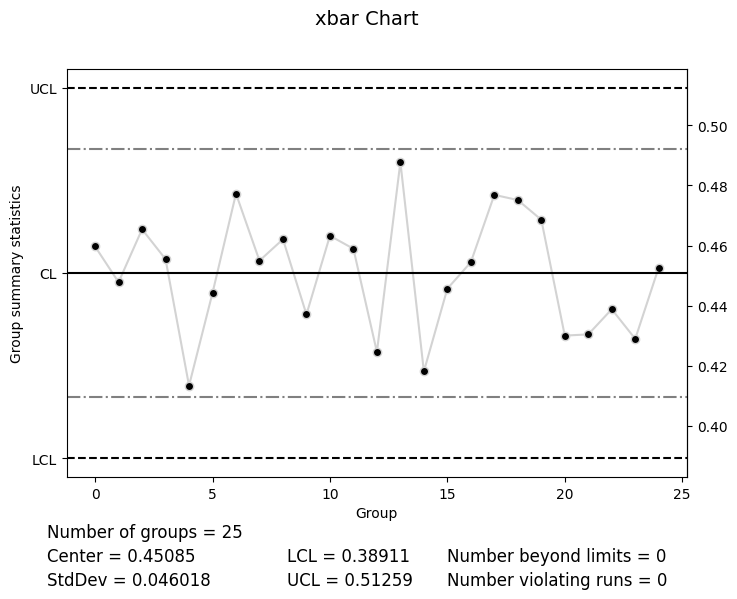

In [ ]:
## The Shewhart Control Charts
gasturbine = mistat.load_data('GASTURBINE')

qcc = mistat.QualityControlChart(gasturbine)
ax = qcc.plot()
ax.axhline(0.4508481 + 0.04601819*2/np.sqrt(5), color='gray', linestyle='-.')
ax.axhline(0.4508481 - 0.04601819*2/np.sqrt(5), color='gray', linestyle='-.')
plt.show()

3.  Control Charts for Attributes

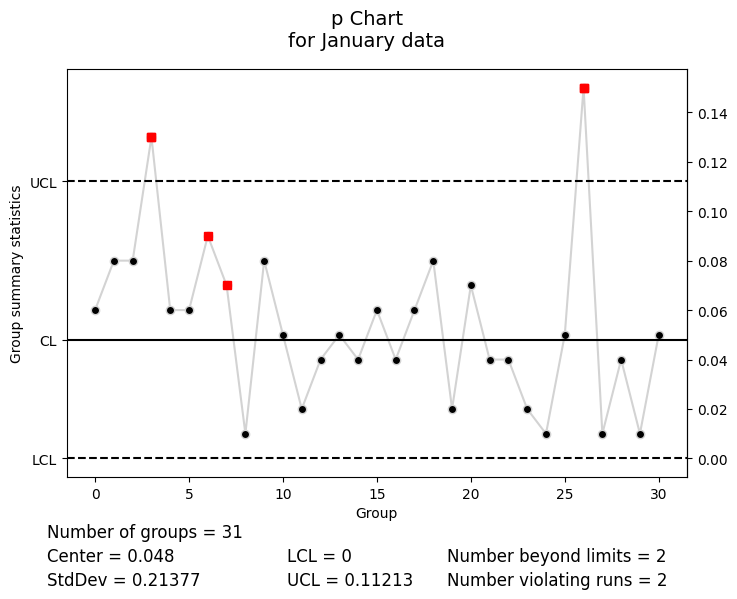

In [ ]:
jandefect = mistat.load_data('JANDEFECT')
jandefect = jandefect / 100

qcc = mistat.QualityControlChart(jandefect, qcc_type='p', sizes=100, center=0.048, std_dev=np.sqrt(0.048*(1-0.048)))
ax = qcc.plot(title='for January data')
for group in (3, 26):
    ax.plot(group, qcc.stats.statistics[group], 'r', marker='s')
plt.show()

# Control Charts for Variables

(1) $\bar X$-Charts

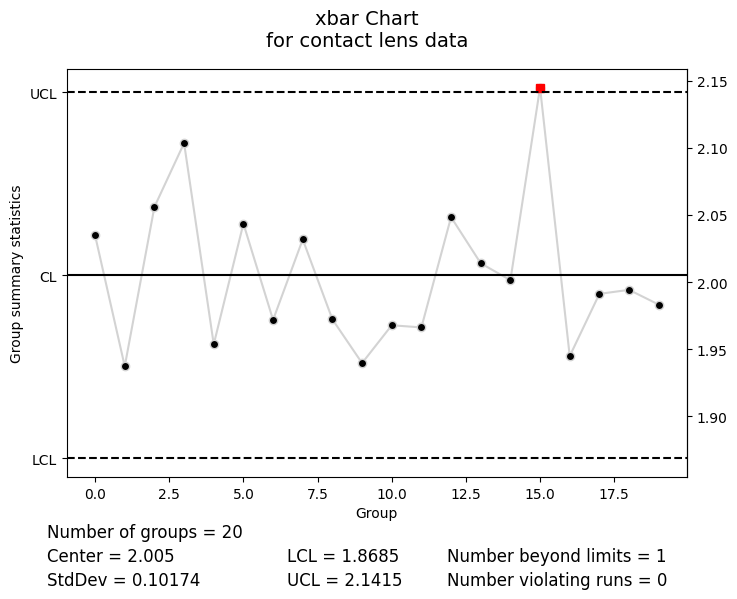

In [ ]:
contactlen = mistat.load_data('CONTACTLEN')
qcc = mistat.QualityControlChart(contactlen, qcc_type='xbar')
ax = qcc.plot(title='for contact lens data')
plt.show()

2. $S$-Charts and $R$-Charts

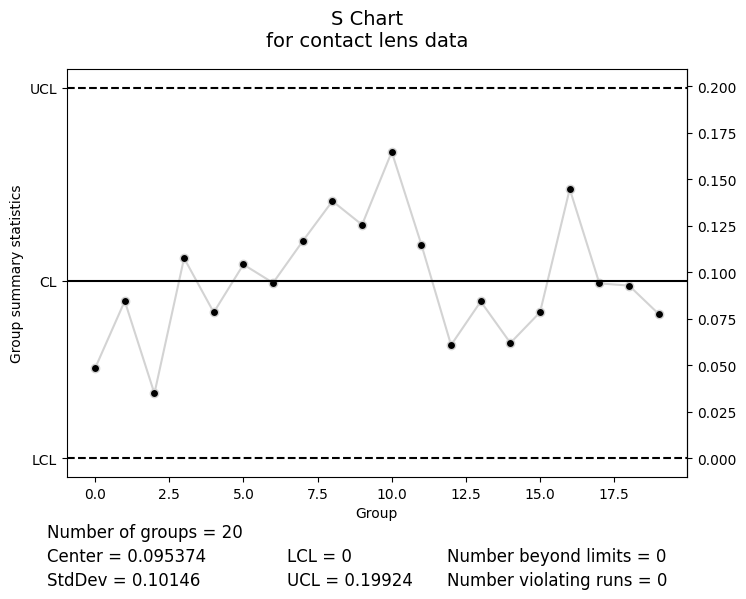

In [ ]:
qcc = mistat.QualityControlChart(contactlen, qcc_type='S')
ax = qcc.plot(title='for contact lens data')
plt.show()

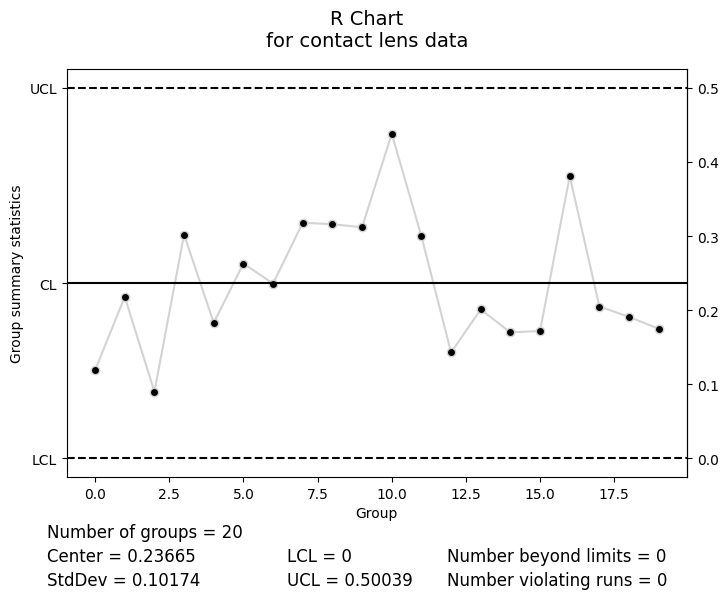

In [ ]:
qcc = mistat.QualityControlChart(contactlen, qcc_type='R')
ax = qcc.plot(title='for contact lens data')
plt.show()